# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import openweathermapy.core as ow

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List

In [2]:
# List for holding lat_lngs and cities

lat_lngs = []
cities = []

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count

len(cities)

620

# Perform API Calls

In [3]:
#Perform API Calls
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
cities_info = []
# Loop through the list of cities and perform a request for data on each
print("Beginning Data Retrieval")
print("=====================")
for city in cities:
    query_url = f"{url}&units={units}&q={city}&appid={api_key}"
    response = requests.get(query_url).json()
    if 'coord' in response:
        cities_info.append(response)
        count = len(cities_info)
        if (count <= 50):
            recordSet = 1
            recordNum = count
        else:
            recordNum = (count - 1) % 50
            recordSet = (count - 1) // 50 + 1
            
        print(f"Processing Record {recordNum} of Set {recordSet} | {city}")             
    else:
        print("City not found. Skipping...")
print("==========================")
print("Data Retrieval Complete")
print("==========================")

Beginning Data Retrieval
Processing Record 1 of Set 1 | anadyr
Processing Record 2 of Set 1 | solnechnyy
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | harrismith
Processing Record 9 of Set 1 | portlethen
Processing Record 10 of Set 1 | busselton
City not found. Skipping...
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | kuytun
City not found. Skipping...
Processing Record 13 of Set 1 | klaksvik
Processing Record 14 of Set 1 | seidu
Processing Record 15 of Set 1 | kaitangata
City not found. Skipping...
Processing Record 16 of Set 1 | rubiataba
Processing Record 17 of Set 1 | kamenka
Processing Record 18 of Set 1 | sunbury
Processing Record 19 of Set 1 | sao filipe
Processing Record 20 of Set 1 | clyde river
Processing Record 21 of Set 1 | avarua
Processing Record 22 of Set 1 |

Processing Record 38 of Set 4 | barrow
Processing Record 39 of Set 4 | yumen
Processing Record 40 of Set 4 | dumai
City not found. Skipping...
Processing Record 41 of Set 4 | panaba
Processing Record 42 of Set 4 | lewiston
Processing Record 43 of Set 4 | rocha
Processing Record 44 of Set 4 | moyale
Processing Record 45 of Set 4 | upernavik
Processing Record 46 of Set 4 | tuktoyaktuk
Processing Record 47 of Set 4 | college
Processing Record 48 of Set 4 | ponta do sol
Processing Record 49 of Set 4 | pacifica
Processing Record 0 of Set 5 | porto novo
Processing Record 1 of Set 5 | narsaq
Processing Record 2 of Set 5 | puerto ayora
Processing Record 3 of Set 5 | hualmay
Processing Record 4 of Set 5 | fortuna
Processing Record 5 of Set 5 | niquelandia
Processing Record 6 of Set 5 | broken hill
Processing Record 7 of Set 5 | east london
City not found. Skipping...
Processing Record 8 of Set 5 | bam
City not found. Skipping...
Processing Record 9 of Set 5 | troitsk
Processing Record 10 of Set

Processing Record 29 of Set 8 | tuatapere
Processing Record 30 of Set 8 | bilma
Processing Record 31 of Set 8 | trairi
Processing Record 32 of Set 8 | gat
Processing Record 33 of Set 8 | novo aripuana
Processing Record 34 of Set 8 | aloleng
Processing Record 35 of Set 8 | yenagoa
Processing Record 36 of Set 8 | dvinskoy
Processing Record 37 of Set 8 | novaya igirma
Processing Record 38 of Set 8 | port blair
Processing Record 39 of Set 8 | sungaipenuh
Processing Record 40 of Set 8 | chapais
Processing Record 41 of Set 8 | meadow lake
Processing Record 42 of Set 8 | hambantota
Processing Record 43 of Set 8 | bajil
Processing Record 44 of Set 8 | grand baie
Processing Record 45 of Set 8 | torbay
Processing Record 46 of Set 8 | beringovskiy
City not found. Skipping...
Processing Record 47 of Set 8 | tunceli
Processing Record 48 of Set 8 | okhotsk
Processing Record 49 of Set 8 | davila
Processing Record 0 of Set 9 | nioro
Processing Record 1 of Set 9 | micheweni
Processing Record 2 of Set 9

Processing Record 20 of Set 12 | aguimes
Data Retrieval Complete


In [4]:
name = [i['name'] for i in cities_info]
names1 = []
names2=[]
clouds = [i['clouds']['all'] for i in cities_info]
clouds1 = []
clouds2=[]
country = [i['sys']['country'] for i in cities_info]
date = [i['dt'] for i in cities_info]
hum = [i['main']['humidity'] for i in cities_info]
hum1=[]
hum2=[]
lat = [i['coord']['lat'] for i in cities_info]
lng = [i['coord']['lon'] for i in cities_info]
max_temp = [i['main']['temp_max'] for i in cities_info]
wind_speed = [i['wind']['speed'] for i in cities_info]
wind_speed1 = []
wind_speed2 = []
north_lats = []
south_lats = []
max_temp1 = []
max_temp2 = []
for x in cities_info:
    if x['coord']['lat'] >= 0:
        names1.append(x['name'])
        north_lats.append(x['coord']['lat'])
        max_temp1.append(x['main']['temp_max'])
        hum1.append(x['main']['humidity'])
        clouds1.append(x['clouds']['all'])
        wind_speed1.append(x['wind']['speed'])
    else:
        names2.append(x['name'])
        south_lats.append(x['coord']['lat'])
        max_temp2.append(x['main']['temp_max'])
        hum2.append(x['main']['humidity'])
        clouds2.append(x['clouds']['all'])
        wind_speed2.append(x['wind']['speed'])

north_hem_data = {"City":names1, 'Cloudiness':clouds1, 'Humidity':hum1, "Lats": north_lats, "Max Temp":max_temp1, "Wind Speed":wind_speed1}
south_hem_data = {"City":names2, 'Cloudiness':clouds2, 'Humidity':hum2, "Lats": south_lats, "Max Temp":max_temp2, "Wind Speed":wind_speed2}
data = {'City': name, 'Cloudiness':clouds, 'Country':country, "Date":date, "Humidity":hum, "Lat":lat, "Lng":lng, "Max Temp":max_temp, "Wind Speed":wind_speed}

# Convert Raw Data to DataFrame

In [5]:
#Import and convert raw data to dataframe
data1 = pd.DataFrame(data)
data1.count()

City          571
Cloudiness    571
Country       571
Date          571
Humidity      571
Lat           571
Lng           571
Max Temp      571
Wind Speed    571
dtype: int64

In [6]:
#Export data to data.csv
exported_data = data1.to_csv(r'output_file')
data1.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Anadyr,98,RU,1588758536,79,64.75,177.48,26.60,20.13
1,Solnechnyy,87,RU,1588758536,48,50.72,136.63,49.64,1.90
2,Hobart,100,AU,1588758357,67,-42.88,147.33,59.00,11.41
3,Yellowknife,75,CA,1588758331,59,62.46,-114.35,33.80,12.75
4,Punta Arenas,100,CL,1588758309,93,-53.15,-70.92,35.60,3.36


# Plotting the Data

# Latitude vs. Temperature Plot

This code creates a scatter plot which compares the latitudes of each city and the maximum temperature the city reached on January 6th. The latitudes closer to the equator show higher maximum temperatures while those further from the equator (especially to the North) have much lower maximum temperatures.


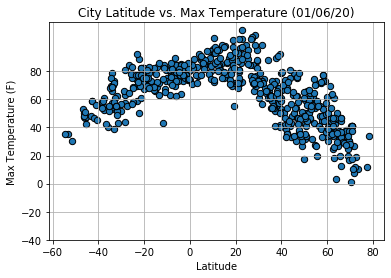

In [7]:
max_temp_lat = data1.plot.scatter("Lat",'Max Temp', edgecolor='black', s=40)
max_temp_lat.set_title("City Latitude vs. Max Temperature (01/06/20)")
max_temp_lat.set_ylabel("Max Temperature (F)")
max_temp_lat.set_xlabel("Latitude")
max_temp_lat.set_yticks(np.arange(-40, 100, 20))
max_temp_lat.grid()
print("This code creates a scatter plot which compares the latitudes of each city and the maximum temperature the city reached on January 6th. The latitudes closer to the equator show higher maximum temperatures while those further from the equator (especially to the North) have much lower maximum temperatures.")

# Latitude vs. Humidity Plot

This code creates a scatter plot which compares the latitudes of each city and the humidity the city reached on January 6th. This plot doees not demonstrate a relationship between latitude and humidity as the humidity percentage varies throughout.


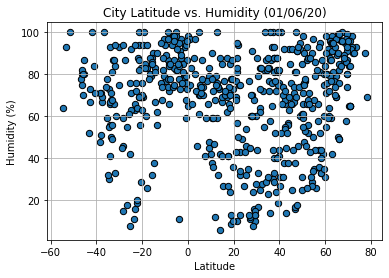

In [8]:

lat_humidity = data1.plot.scatter("Lat", "Humidity", edgecolor='black', s=40)
lat_humidity.set_title("City Latitude vs. Humidity (01/06/20)")
lat_humidity.set_ylabel("Humidity (%)")
lat_humidity.set_xlabel("Latitude")
lat_humidity.grid()
print("This code creates a scatter plot which compares the latitudes of each city and the humidity the city reached on January 6th. This plot doees not demonstrate a relationship between latitude and humidity as the humidity percentage varies throughout.")


# Latitude vs. Cloudiness Plot

This code creates a scatter plot which compares the latitudes of each city and the cloud percentage the city reached on January 6th. This plot shows that the percentage of clouds varies by latitude and that there is no direct correlation between the two.


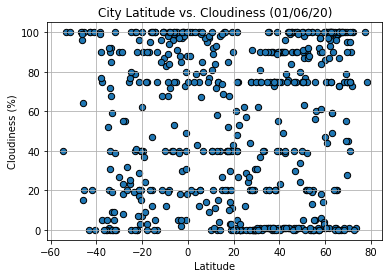

In [9]:
lat_cloudiness = data1.plot.scatter("Lat","Cloudiness", edgecolor='black', s=40)
lat_cloudiness.set_title("City Latitude vs. Cloudiness (01/06/20)")
lat_cloudiness.set_ylabel("Cloudiness (%)")
lat_cloudiness.set_xlabel("Latitude")
lat_cloudiness.grid()
print("This code creates a scatter plot which compares the latitudes of each city and the cloud percentage the city reached on January 6th. This plot shows that the percentage of clouds varies by latitude and that there is no direct correlation between the two.")

# Latitude vs. Wind Speed Plot

This code creates a scatter plot from the data on the wind speed at a specific latitude. The latitudes with the highest wind speed are located around latitude 60(The northern hemisphere).


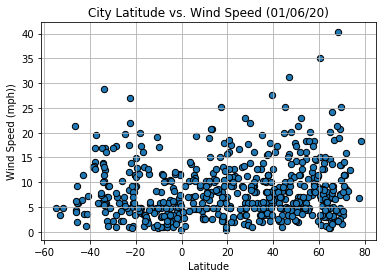

In [10]:
lat_wind_speed = data1.plot.scatter("Lat", "Wind Speed", edgecolor='black', s=40)
lat_wind_speed.set_title("City Latitude vs. Wind Speed (01/06/20)")
lat_wind_speed.set_ylabel("Wind Speed (mph))")
lat_wind_speed.set_xlabel("Latitude")
lat_wind_speed.grid()
print('This code creates a scatter plot from the data on the wind speed at a specific latitude. The latitudes with the highest wind speed are located around latitude 60(The northern hemisphere).')


# Linear Regression

In [11]:
def lineregress(x,y):
    slope, intercept, rvalue, p_value, std_err =linregress(x, y)   
    plt.plot(x, [intercept + slope*val for val in x], 'r')
    print(f"The R-squared is: {rvalue}")
north_hem_data = data1.loc[data1["Lat"]>= 0]
north_hem_data.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Anadyr,98,RU,1588758536,79,64.75,177.48,26.60,20.13
1,Solnechnyy,87,RU,1588758536,48,50.72,136.63,49.64,1.90
3,Yellowknife,75,CA,1588758331,59,62.46,-114.35,33.80,12.75
8,Portlethen,0,GB,1588758536,58,57.05,-2.13,55.40,3.36
11,Kuytun,100,RU,1588758537,64,54.34,101.50,43.16,18.41


In [12]:
south_hem_data = data1.loc[data1["Lat"]< 0]
south_hem_data.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
2,Hobart,100,AU,1588758357,67,-42.88,147.33,59.00,11.41
4,Punta Arenas,100,CL,1588758309,93,-53.15,-70.92,35.60,3.36
5,Mataura,100,NZ,1588758536,80,-46.19,168.86,47.59,4.34
6,Port Alfred,92,ZA,1588758536,68,-33.59,26.89,70.50,12.39
7,Harrismith,23,ZA,1588758536,46,-28.27,29.13,63.21,7.11


# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The R-squared is: -0.8202056573700914
In the below linear regression plot in the northern hemisphere shows us that the maximum temperature vs. the latitude linear regression on the globe gradually decreases as you pull away from the equatorial regions of the Earth.


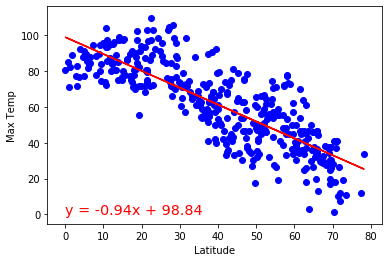

In [14]:
lineregress(north_lats, max_temp1)
slope, intercept, rvalue, p_value, std_err =linregress(north_lats,max_temp1)
plt.scatter(north_lats,max_temp1, c='b')
slope = '{0:,.2f}'.format(slope)
intercept = '{0:,.2f}'.format(intercept)
plt.text(0,0,s=f"y = {slope}x + {intercept}", c='r', size='x-large')
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.savefig("north_max_temp.png")
print("In the below linear regression plot in the northern hemisphere shows us that the maximum temperature vs. the latitude linear regression on the globe gradually decreases as you pull away from the equatorial regions of the Earth.") 

# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The R-squared is: 0.7358435651926675
In the below linear regression plot in the southern hemisphere this shows us that the maxiumum temperature vs. latitude linear regression shows us that as you travel closer to the equatorial region of the Earth the maximum temperature tends to increase.


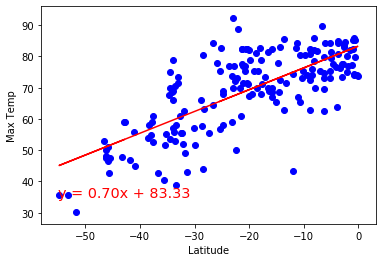

In [15]:
lineregress(south_lats, max_temp2)
slope, intercept, rvalue, p_value, std_err =linregress(south_lats, max_temp2)
plt.scatter(south_lats, max_temp2, c='b')
slope = '{0:,.2f}'.format(slope)
intercept = '{0:,.2f}'.format(intercept)
plt.text(-55,35,s=f"y = {slope}x + {intercept}", c='r', size='x-large')
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.savefig("south_max_temp.png")
print("In the below linear regression plot in the southern hemisphere this shows us that the maxiumum temperature vs. latitude linear regression shows us that as you travel closer to the equatorial region of the Earth the maximum temperature tends to increase.")

# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R-squared is: 0.24251468053846342
The linear regression model below shows us that the humidity % vs. the latitude shows us that cities across the globe that have a latitude further north tend to have more humidity percentages than those of the lower latitudes.


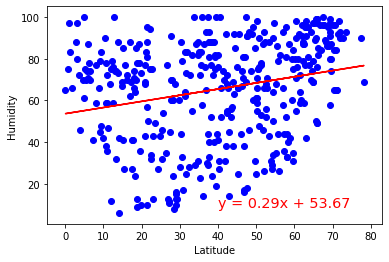

In [17]:

lineregress(north_lats, hum1)
slope, intercept, rvalue, p_value, std_err =linregress(north_lats, hum1)
plt.scatter(north_lats, hum1, c='b')
slope = '{0:,.2f}'.format(slope)
intercept = '{0:,.2f}'.format(intercept)
plt.text(40,9,s=f"y = {slope}x + {intercept}", c='r', size='x-large')
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.savefig("north_hum.png")
print("The linear regression model below shows us that the humidity % vs. the latitude shows us that cities across the globe that have a latitude further north tend to have more humidity percentages than those of the lower latitudes.")

# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R-squared is: 0.2491842612892539
The linear regression above provides us with data that acknowledges the fact that the humidity level increases as the location of the city moves further north. More northern locations tend to be more humid than locations closer to the equator. The second graphic below shows that the linear regression of the humidity levels in accordance to location increases as the location approaches the equator. The data varies throughout the scatter plot, but it can be noted that the locations closer to the equator will have higher humidity levels than those further south of the equator.


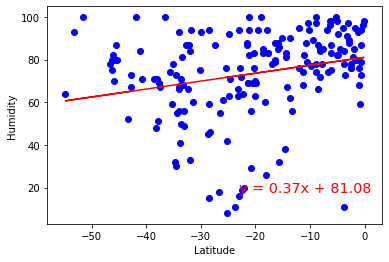

In [18]:

lineregress(south_lats, hum2)
slope, intercept, rvalue, p_value, std_err =linregress(south_lats, hum2)
plt.scatter(south_lats, hum2, c='b')
slope = '{0:,.2f}'.format(slope)
intercept = '{0:,.2f}'.format(intercept)
plt.text(-23,18,s=f"y = {slope}x + {intercept}", c='r', size='x-large')
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.savefig("south_hum.png")
print("The linear regression above provides us with data that acknowledges the fact that the humidity level increases as the location of the city moves further north. More northern locations tend to be more humid than locations closer to the equator. The second graphic below shows that the linear regression of the humidity levels in accordance to location increases as the location approaches the equator. The data varies throughout the scatter plot, but it can be noted that the locations closer to the equator will have higher humidity levels than those further south of the equator.")


# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R-squared is: 0.16581895510311867
Down below the linear regression model shows us in the northern hemisphere just past the equatorial region tells us that the amount of cloudiness percentage increases as the latitudes increase, this is due to increased humidity in the atmosphere.


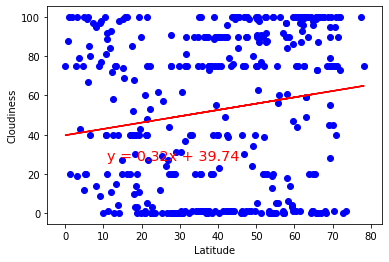

In [21]:

lineregress(north_lats, clouds1)
slope, intercept, rvalue, p_value, std_err =linregress(north_lats, clouds1)
plt.scatter(north_lats, clouds1, c='b')
slope = '{0:,.2f}'.format(slope)
intercept = '{0:,.2f}'.format(intercept)
plt.text(11,27,s=f"y = {slope}x + {intercept}", c='r', size='x-large')
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.savefig("north_clouds.png")
print("Down below the linear regression model shows us in the northern hemisphere just past the equatorial region tells us that the amount of cloudiness percentage increases as the latitudes increase, this is due to increased humidity in the atmosphere.")

# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R-squared is: 0.15432447803564658
Down below the linear regression model shows us in the southern hemisphere just past the equatorial region tells us that the amount of cloudiness percentage decreases as the latitudes decrease, this is due to decreased humidity in the atmosphere.


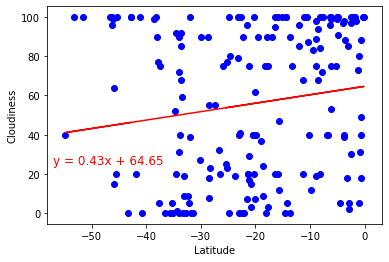

In [23]:
lineregress(south_lats, clouds2)
slope, intercept, rvalue, p_value, std_err =linregress(south_lats, clouds2)
plt.scatter(south_lats, clouds2, c='b')
slope = '{0:,.2f}'.format(slope)
intercept = '{0:,.2f}'.format(intercept)
plt.text(-57,25,s=f"y = {slope}x + {intercept}", c='r', size='large')
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.savefig("south_clouds.png")
print("Down below the linear regression model shows us in the southern hemisphere just past the equatorial region tells us that the amount of cloudiness percentage decreases as the latitudes decrease, this is due to decreased humidity in the atmosphere.")

# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R-squared is: 0.08128495995632593
The linear regression model below on the northern hemisphere data tells us that the wind speed in the northern latitudes tend to have a very slight and steady linear regression line. The winds tend to increase as the latitudes increase away from the equatorial region in the northern hemisphere.


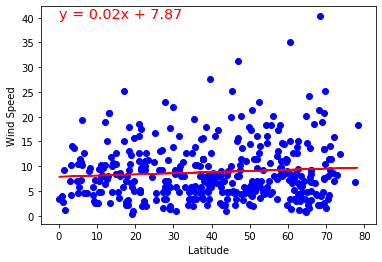

In [24]:
lineregress(north_lats, wind_speed1)
slope, intercept, rvalue, p_value, std_err =linregress(north_lats, wind_speed1)
plt.scatter(north_lats, wind_speed1, c='b')
slope = '{0:,.2f}'.format(slope)
intercept = '{0:,.2f}'.format(intercept)
plt.text(0,40,s=f"y = {slope}x + {intercept}", c='r', size='x-large')
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.savefig("north_wind.png")
print("The linear regression model below on the northern hemisphere data tells us that the wind speed in the northern latitudes tend to have a very slight and steady linear regression line. The winds tend to increase as the latitudes increase away from the equatorial region in the northern hemisphere.")


# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R-squared is: -0.22292809162047633
The linear regression model below on the southern hemisphere data tells  us that the wind speed in the southern latitudes have a slight negative slope as the each city location nears the equator. As you travel further south of the equator within the southern hemisphere towards the southern latitudes the winds speeds tend to increase.


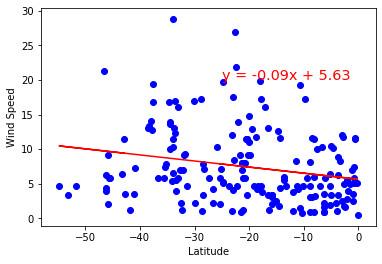

In [25]:

lineregress(south_lats, wind_speed2)
slope, intercept, rvalue, p_value, std_err =linregress(south_lats, wind_speed2)
plt.scatter(south_lats, wind_speed2, c='b')
slope = '{0:,.2f}'.format(slope)
intercept = '{0:,.2f}'.format(intercept)
plt.text(-25,20,s=f"y = {slope}x + {intercept}", c='r', size='x-large')
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.savefig("south_wind.png")
print("The linear regression model below on the southern hemisphere data tells  us that the wind speed in the southern latitudes have a slight negative slope as the each city location nears the equator. As you travel further south of the equator within the southern hemisphere towards the southern latitudes the winds speeds tend to increase.")
